In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    loss = criterion(output, true_label)
    return loss
    ######################################
    
def discriminator_loss(output_real, output_fake, true_label, fake_label):
    ############ YOUR CODE HERE ##########
    loss_real = criterion(output_real, true_label)
    loss_fake = criterion(output_fake, fake_label)
    total_loss = loss_real + loss_fake
    return total_loss
    ######################################
    

# Q1.a

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs_1a already exists.
Error occurred while processing: outputs_1a.
118it [00:11, 10.28it/s]                                                                                               


Epoch 1 of 100
Generator loss: 0.01647169, Discriminator loss: 0.91870677


118it [00:11, 10.33it/s]                                                                                               


Epoch 2 of 100
Generator loss: 0.05869793, Discriminator loss: 1.28468303


118it [00:11, 10.00it/s]                                                                                               


Epoch 3 of 100
Generator loss: 0.00382208, Discriminator loss: 0.81368336


118it [00:13,  8.79it/s]                                                                                               


Epoch 4 of 100
Generator loss: 0.04910008, Discriminator loss: 1.05997061


118it [00:12,  9.13it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


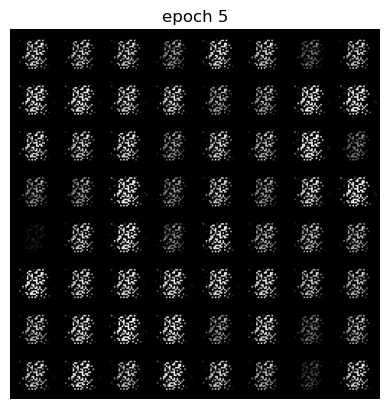

Epoch 5 of 100
Generator loss: 0.05585056, Discriminator loss: 1.19312568


118it [00:13,  8.93it/s]                                                                                               


Epoch 6 of 100
Generator loss: 0.02700788, Discriminator loss: 0.82666342


118it [00:13,  8.81it/s]                                                                                               


Epoch 7 of 100
Generator loss: 0.02531749, Discriminator loss: 1.28857883


118it [00:13,  8.75it/s]                                                                                               


Epoch 8 of 100
Generator loss: 0.02684528, Discriminator loss: 1.17575428


118it [00:13,  8.85it/s]                                                                                               


Epoch 9 of 100
Generator loss: 0.02732094, Discriminator loss: 1.06455299


118it [00:13,  8.96it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


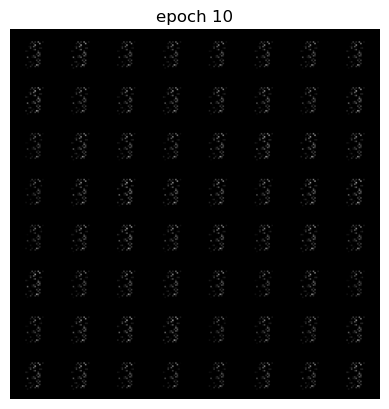

Epoch 10 of 100
Generator loss: 0.01211680, Discriminator loss: 1.25709741


118it [00:13,  8.51it/s]                                                                                               


Epoch 11 of 100
Generator loss: 0.03379290, Discriminator loss: 1.07461899


118it [00:13,  8.94it/s]                                                                                               


Epoch 12 of 100
Generator loss: 0.01822269, Discriminator loss: 1.28314942


118it [00:13,  9.01it/s]                                                                                               


Epoch 13 of 100
Generator loss: 0.02026893, Discriminator loss: 1.24429820


118it [00:13,  8.99it/s]                                                                                               


Epoch 14 of 100
Generator loss: 0.01636997, Discriminator loss: 1.39494803


118it [00:13,  8.99it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


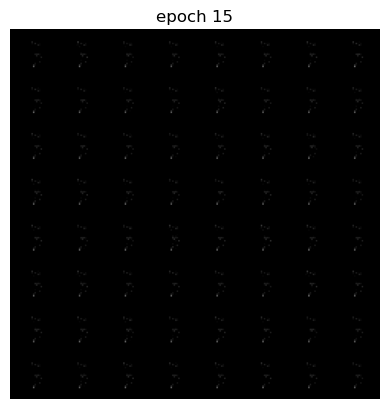

Epoch 15 of 100
Generator loss: 0.00903660, Discriminator loss: 1.25958560


118it [00:13,  8.95it/s]                                                                                               


Epoch 16 of 100
Generator loss: 0.01701522, Discriminator loss: 1.25045809


118it [00:12,  9.26it/s]                                                                                               


Epoch 17 of 100
Generator loss: 0.02261471, Discriminator loss: 1.27751938


118it [00:12,  9.30it/s]                                                                                               


Epoch 18 of 100
Generator loss: 0.02659041, Discriminator loss: 1.07277815


118it [00:12,  9.32it/s]                                                                                               


Epoch 19 of 100
Generator loss: 0.02080662, Discriminator loss: 1.34737331


118it [00:12,  9.17it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


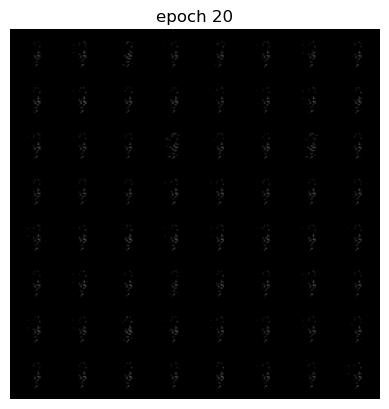

Epoch 20 of 100
Generator loss: 0.01730084, Discriminator loss: 1.06678046


118it [00:13,  9.05it/s]                                                                                               


Epoch 21 of 100
Generator loss: 0.04670164, Discriminator loss: 1.10157798


118it [00:12,  9.15it/s]                                                                                               


Epoch 22 of 100
Generator loss: 0.03396947, Discriminator loss: 0.83050593


118it [00:12,  9.25it/s]                                                                                               


Epoch 23 of 100
Generator loss: 0.01869204, Discriminator loss: 0.80373858


118it [00:12,  9.20it/s]                                                                                               


Epoch 24 of 100
Generator loss: 0.04486392, Discriminator loss: 0.54961095


118it [00:12,  9.13it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


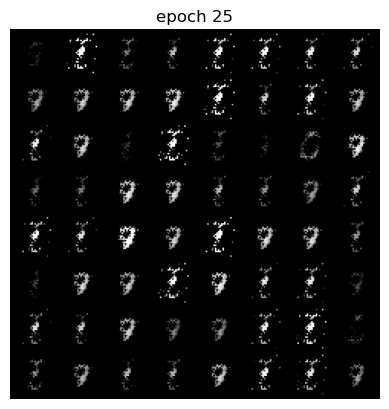

Epoch 25 of 100
Generator loss: 0.03504093, Discriminator loss: 0.70173465


118it [00:12,  9.17it/s]                                                                                               


Epoch 26 of 100
Generator loss: 0.05017558, Discriminator loss: 0.63588120


118it [00:12,  9.11it/s]                                                                                               


Epoch 27 of 100
Generator loss: 0.04507919, Discriminator loss: 0.60679176


118it [00:12,  9.14it/s]                                                                                               


Epoch 28 of 100
Generator loss: 0.04501260, Discriminator loss: 0.78499990


118it [00:12,  9.19it/s]                                                                                               


Epoch 29 of 100
Generator loss: 0.04834144, Discriminator loss: 0.50444001


118it [00:12,  9.17it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


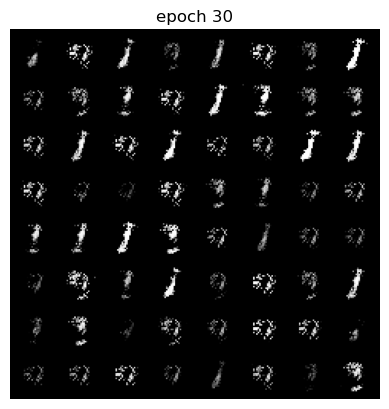

Epoch 30 of 100
Generator loss: 0.03951638, Discriminator loss: 0.58845934


118it [00:12,  9.08it/s]                                                                                               


Epoch 31 of 100
Generator loss: 0.03851293, Discriminator loss: 0.55114693


118it [00:13,  9.05it/s]                                                                                               


Epoch 32 of 100
Generator loss: 0.04475365, Discriminator loss: 0.53775805


118it [00:12,  9.13it/s]                                                                                               


Epoch 33 of 100
Generator loss: 0.03271638, Discriminator loss: 0.64477786


118it [00:12,  9.16it/s]                                                                                               


Epoch 34 of 100
Generator loss: 0.05227204, Discriminator loss: 0.56567807


118it [00:12,  9.11it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


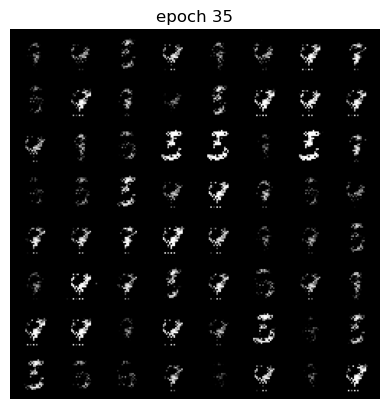

Epoch 35 of 100
Generator loss: 0.04915459, Discriminator loss: 0.59149829


118it [00:12,  9.13it/s]                                                                                               


Epoch 36 of 100
Generator loss: 0.05425054, Discriminator loss: 0.58346093


118it [00:12,  9.10it/s]                                                                                               


Epoch 37 of 100
Generator loss: 0.05594095, Discriminator loss: 0.61013560


118it [00:13,  9.05it/s]                                                                                               


Epoch 38 of 100
Generator loss: 0.05499909, Discriminator loss: 0.61618467


118it [00:13,  9.07it/s]                                                                                               


Epoch 39 of 100
Generator loss: 0.03610886, Discriminator loss: 0.60522759


118it [00:12,  9.16it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


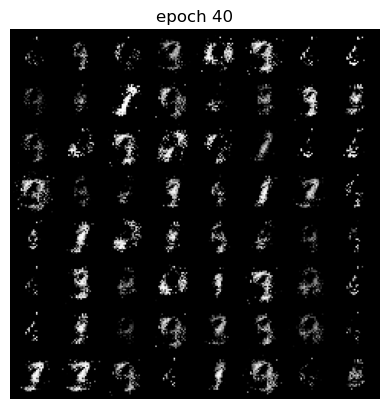

Epoch 40 of 100
Generator loss: 0.05584761, Discriminator loss: 0.54435330


118it [00:12,  9.14it/s]                                                                                               


Epoch 41 of 100
Generator loss: 0.04582452, Discriminator loss: 0.53352993


118it [00:12,  9.10it/s]                                                                                               


Epoch 42 of 100
Generator loss: 0.04250341, Discriminator loss: 0.47261730


118it [00:13,  9.02it/s]                                                                                               


Epoch 43 of 100
Generator loss: 0.05992192, Discriminator loss: 0.48994958


118it [00:13,  8.61it/s]                                                                                               


Epoch 44 of 100
Generator loss: 0.03179454, Discriminator loss: 0.62184993


118it [00:13,  8.94it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


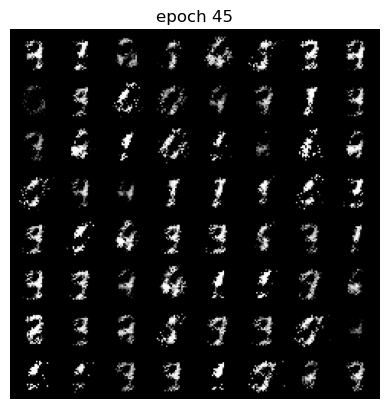

Epoch 45 of 100
Generator loss: 0.04325673, Discriminator loss: 0.78873025


118it [00:13,  8.98it/s]                                                                                               


Epoch 46 of 100
Generator loss: 0.03981953, Discriminator loss: 0.67878956


118it [00:13,  8.63it/s]                                                                                               


Epoch 47 of 100
Generator loss: 0.04904201, Discriminator loss: 0.59537381


118it [00:14,  8.42it/s]                                                                                               


Epoch 48 of 100
Generator loss: 0.04414076, Discriminator loss: 0.54065123


118it [00:13,  8.86it/s]                                                                                               


Epoch 49 of 100
Generator loss: 0.04190437, Discriminator loss: 0.50199767


118it [00:13,  9.07it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


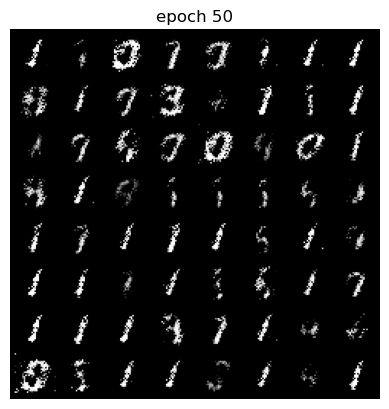

Epoch 50 of 100
Generator loss: 0.04057743, Discriminator loss: 0.55747126


118it [00:13,  9.02it/s]                                                                                               


Epoch 51 of 100
Generator loss: 0.04605392, Discriminator loss: 0.59003125


118it [00:12,  9.20it/s]                                                                                               


Epoch 52 of 100
Generator loss: 0.03348587, Discriminator loss: 0.52534679


118it [00:13,  9.04it/s]                                                                                               


Epoch 53 of 100
Generator loss: 0.04778034, Discriminator loss: 0.68089484


118it [00:12,  9.13it/s]                                                                                               


Epoch 54 of 100
Generator loss: 0.05882750, Discriminator loss: 0.69723817


118it [00:13,  9.06it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


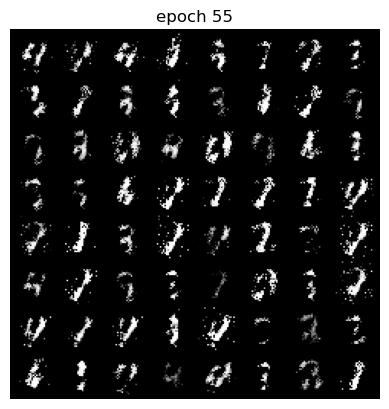

Epoch 55 of 100
Generator loss: 0.04507316, Discriminator loss: 0.50076518


118it [00:13,  8.89it/s]                                                                                               


Epoch 56 of 100
Generator loss: 0.06024339, Discriminator loss: 0.53031563


118it [00:13,  9.02it/s]                                                                                               


Epoch 57 of 100
Generator loss: 0.05138027, Discriminator loss: 0.46462429


118it [00:13,  9.01it/s]                                                                                               


Epoch 58 of 100
Generator loss: 0.05351101, Discriminator loss: 0.50184407


118it [00:13,  8.97it/s]                                                                                               


Epoch 59 of 100
Generator loss: 0.06373058, Discriminator loss: 0.49998283


118it [00:13,  9.06it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


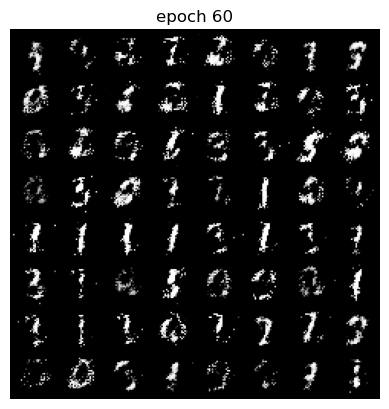

Epoch 60 of 100
Generator loss: 0.03908852, Discriminator loss: 0.56445180


118it [00:13,  9.07it/s]                                                                                               


Epoch 61 of 100
Generator loss: 0.04824222, Discriminator loss: 0.60168733


118it [00:13,  8.96it/s]                                                                                               


Epoch 62 of 100
Generator loss: 0.04776516, Discriminator loss: 0.56941019


118it [00:13,  8.99it/s]                                                                                               


Epoch 63 of 100
Generator loss: 0.05700025, Discriminator loss: 0.54447308


118it [00:13,  8.94it/s]                                                                                               


Epoch 64 of 100
Generator loss: 0.04880465, Discriminator loss: 0.59745819


118it [00:13,  9.02it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


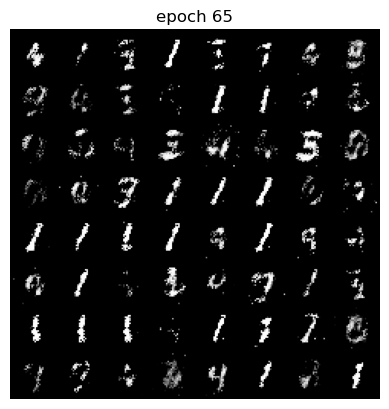

Epoch 65 of 100
Generator loss: 0.04265913, Discriminator loss: 0.58527955


118it [00:13,  8.90it/s]                                                                                               


Epoch 66 of 100
Generator loss: 0.04140854, Discriminator loss: 0.62545795


118it [00:13,  8.79it/s]                                                                                               


Epoch 67 of 100
Generator loss: 0.04534765, Discriminator loss: 0.68059806


118it [00:13,  9.03it/s]                                                                                               


Epoch 68 of 100
Generator loss: 0.04035852, Discriminator loss: 0.66989363


118it [00:12,  9.08it/s]                                                                                               


Epoch 69 of 100
Generator loss: 0.03909333, Discriminator loss: 0.63064092


118it [00:13,  9.04it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


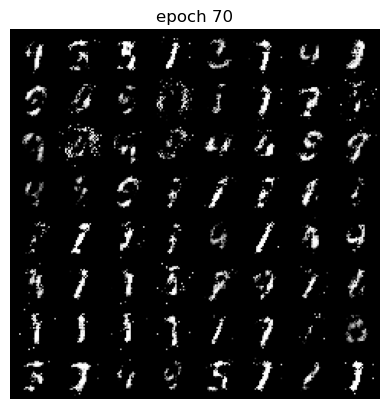

Epoch 70 of 100
Generator loss: 0.03967440, Discriminator loss: 0.59490030


118it [00:13,  9.03it/s]                                                                                               


Epoch 71 of 100
Generator loss: 0.04046499, Discriminator loss: 0.65338689


118it [00:12,  9.09it/s]                                                                                               


Epoch 72 of 100
Generator loss: 0.05258790, Discriminator loss: 0.59844503


118it [00:13,  9.07it/s]                                                                                               


Epoch 73 of 100
Generator loss: 0.04669743, Discriminator loss: 0.58095631


118it [00:12,  9.09it/s]                                                                                               


Epoch 74 of 100
Generator loss: 0.04887811, Discriminator loss: 0.67234406


118it [00:12,  9.09it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


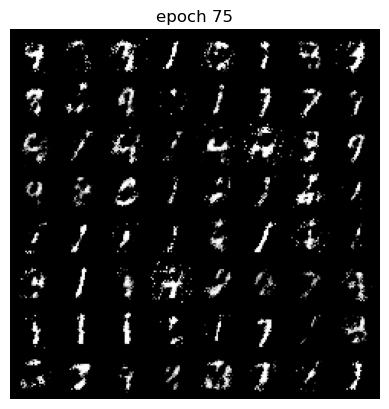

Epoch 75 of 100
Generator loss: 0.03324401, Discriminator loss: 0.64972704


118it [00:13,  8.57it/s]                                                                                               


Epoch 76 of 100
Generator loss: 0.03833406, Discriminator loss: 0.63283117


118it [00:12,  9.10it/s]                                                                                               


Epoch 77 of 100
Generator loss: 0.03147325, Discriminator loss: 0.70924215


118it [00:12,  9.18it/s]                                                                                               


Epoch 78 of 100
Generator loss: 0.03397254, Discriminator loss: 0.71778473


118it [00:12,  9.09it/s]                                                                                               


Epoch 79 of 100
Generator loss: 0.03322800, Discriminator loss: 0.73339262


118it [00:12,  9.09it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


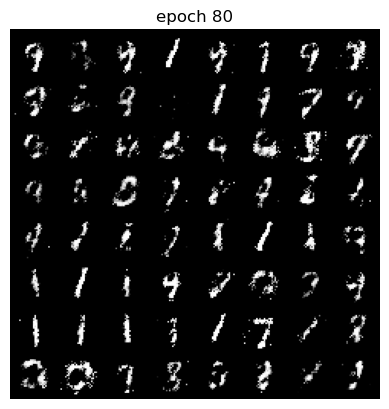

Epoch 80 of 100
Generator loss: 0.04240045, Discriminator loss: 0.72578876


118it [00:13,  9.06it/s]                                                                                               


Epoch 81 of 100
Generator loss: 0.03504943, Discriminator loss: 0.73292914


118it [00:13,  9.01it/s]                                                                                               


Epoch 82 of 100
Generator loss: 0.03328942, Discriminator loss: 0.71014229


118it [00:12,  9.10it/s]                                                                                               


Epoch 83 of 100
Generator loss: 0.03916756, Discriminator loss: 0.72186315


118it [00:13,  9.05it/s]                                                                                               


Epoch 84 of 100
Generator loss: 0.02965587, Discriminator loss: 0.71700595


118it [00:13,  9.05it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


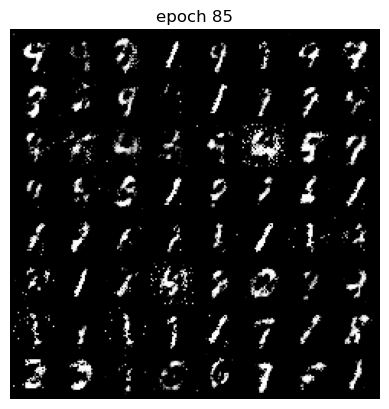

Epoch 85 of 100
Generator loss: 0.02379682, Discriminator loss: 0.71756779


118it [00:12,  9.15it/s]                                                                                               


Epoch 86 of 100
Generator loss: 0.03583926, Discriminator loss: 0.75079571


118it [00:12,  9.10it/s]                                                                                               


Epoch 87 of 100
Generator loss: 0.02599405, Discriminator loss: 0.81218300


118it [00:12,  9.11it/s]                                                                                               


Epoch 88 of 100
Generator loss: 0.03070080, Discriminator loss: 0.77446364


118it [00:13,  9.04it/s]                                                                                               


Epoch 89 of 100
Generator loss: 0.03751861, Discriminator loss: 0.73517117


118it [00:13,  9.04it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


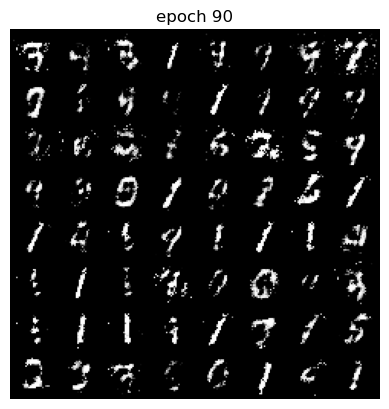

Epoch 90 of 100
Generator loss: 0.03597365, Discriminator loss: 0.76392897


118it [00:12,  9.20it/s]                                                                                               


Epoch 91 of 100
Generator loss: 0.03309379, Discriminator loss: 0.79099650


118it [00:13,  9.06it/s]                                                                                               


Epoch 92 of 100
Generator loss: 0.03695713, Discriminator loss: 0.76845890


118it [00:12,  9.24it/s]                                                                                               


Epoch 93 of 100
Generator loss: 0.03874055, Discriminator loss: 0.76689389


118it [00:12,  9.14it/s]                                                                                               


Epoch 94 of 100
Generator loss: 0.03010588, Discriminator loss: 0.78644011


118it [00:13,  8.98it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


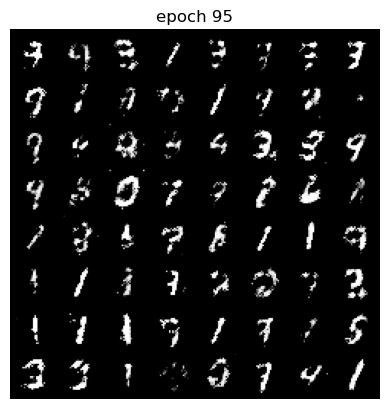

Epoch 95 of 100
Generator loss: 0.03679591, Discriminator loss: 0.74670646


118it [00:12,  9.11it/s]                                                                                               


Epoch 96 of 100
Generator loss: 0.04163635, Discriminator loss: 0.75688285


118it [00:13,  9.07it/s]                                                                                               


Epoch 97 of 100
Generator loss: 0.04368828, Discriminator loss: 0.75050664


118it [00:13,  8.98it/s]                                                                                               


Epoch 98 of 100
Generator loss: 0.03584186, Discriminator loss: 0.76981503


118it [00:13,  9.02it/s]                                                                                               


Epoch 99 of 100
Generator loss: 0.02641749, Discriminator loss: 0.76676282


118it [00:13,  9.07it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


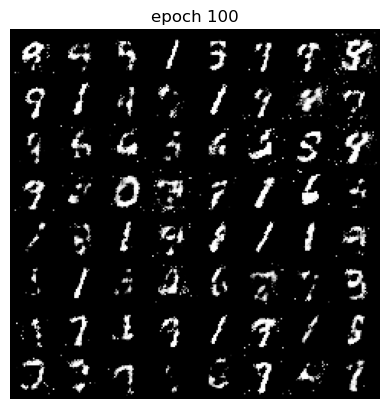

Epoch 100 of 100
Generator loss: 0.04446637, Discriminator loss: 0.77197993


In [15]:
# Make output folders
!mkdir -p outputs_1a

#initialize
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator


# loop
epochs =100
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        # Training the Discriminator
        discriminator.zero_grad()
        
        real_images = data[0].to(device)
        real_labels = label_real(real_images.size(0))
        
        # Forward pass real images through discriminator
        output_real = discriminator(real_images)
        
        # Generate fake images
        noise_d = create_noise(real_images.size(0), nz)
        fake_images = generator(noise_d)
        fake_labels = label_fake(fake_images.size(0))
        
        # Forward pass fake images through discriminator
        output_fake = discriminator(fake_images.detach())  # Detach to avoid computing gradients for generator
        
        # Compute total discriminator loss and backpropagate
        total_loss_d = discriminator_loss(output_real, output_fake, real_labels, fake_labels)
        total_loss_d.backward()
        optim_d.step()
        
        loss_d += total_loss_d.item()
        
        ####################
        # Training the Generator
        generator.zero_grad()
        
        # Generate fake images
        noise_g = create_noise(real_images.size(0), nz)
        fake_images = generator(noise_g)
        
        # Forward pass fake images through discriminator after generator update
        output = discriminator(fake_images)
        loss_g = generator_loss(output, real_labels)  # Generator wants to fool the discriminator
        
        # Backpropagate the generator loss
        loss_g.backward()
        optim_g.step()
        
        loss_g += loss_g.item()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs_1a/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [16]:
g_loss = [losses_g[i].item() for i in range(len(losses_g))]

In [17]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs_1a/generator.pth')

DONE TRAINING


In [18]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_1a/generator_images.gif', imgs)

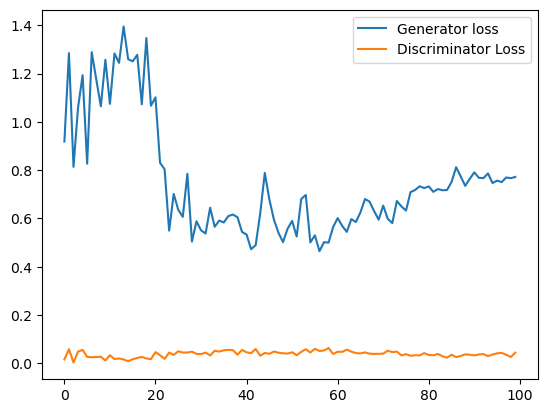

In [19]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(g_loss, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs_1a/loss.png')

# Q1.b

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs_1a already exists.
Error occurred while processing: outputs_1a.
118it [00:11,  9.89it/s]                                                                                               


Epoch 1 of 100
Generator loss: 0.00000000, Discriminator loss: 0.07996505


118it [00:13,  8.87it/s]                                                                                               


Epoch 2 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.76it/s]                                                                                               


Epoch 3 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.64it/s]                                                                                               


Epoch 4 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.80it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


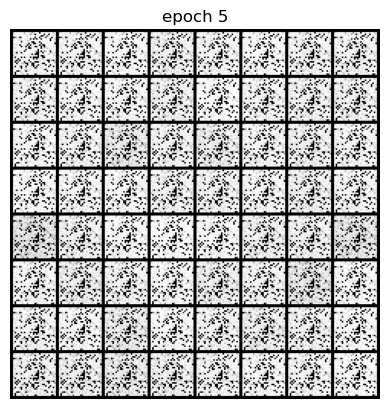

Epoch 5 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.91it/s]                                                                                               


Epoch 6 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.98it/s]                                                                                               


Epoch 7 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.90it/s]                                                                                               


Epoch 8 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:13,  8.59it/s]                                                                                               


Epoch 9 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.31it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


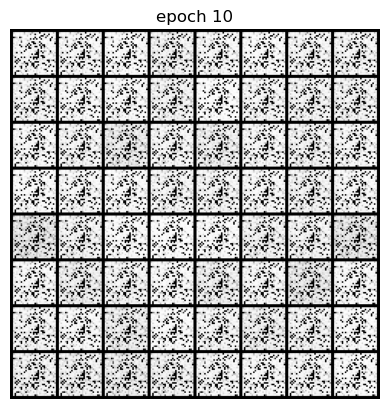

Epoch 10 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.32it/s]                                                                                               


Epoch 11 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.23it/s]                                                                                               


Epoch 12 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.29it/s]                                                                                               


Epoch 13 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.25it/s]                                                                                               


Epoch 14 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.17it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


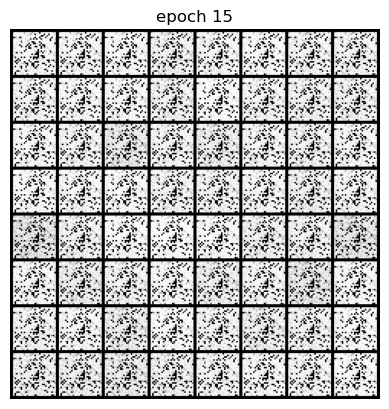

Epoch 15 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.16it/s]                                                                                               


Epoch 16 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.13it/s]                                                                                               


Epoch 17 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.94it/s]                                                                                               


Epoch 18 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.04it/s]                                                                                               


Epoch 19 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.88it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


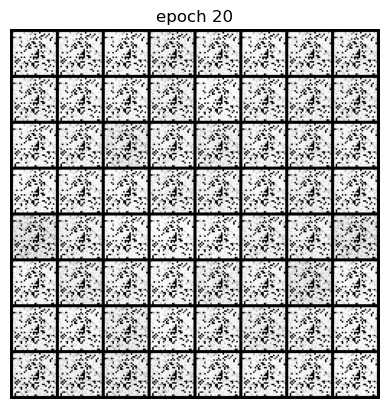

Epoch 20 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.79it/s]                                                                                               


Epoch 21 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.77it/s]                                                                                               


Epoch 22 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.78it/s]                                                                                               


Epoch 23 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.90it/s]                                                                                               


Epoch 24 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.91it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


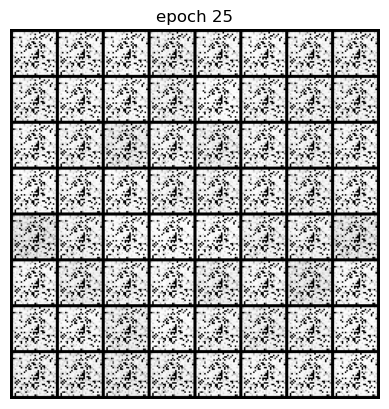

Epoch 25 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.96it/s]                                                                                               


Epoch 26 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.84it/s]                                                                                               


Epoch 27 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.63it/s]                                                                                               


Epoch 28 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.99it/s]                                                                                               


Epoch 29 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.85it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


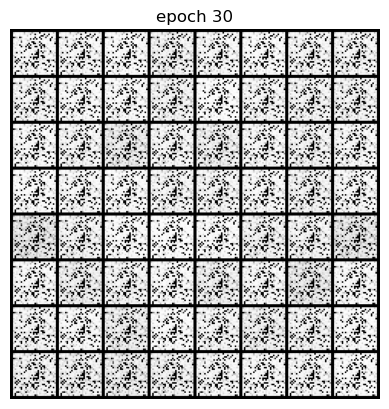

Epoch 30 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.78it/s]                                                                                               


Epoch 31 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.94it/s]                                                                                               


Epoch 32 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.04it/s]                                                                                               


Epoch 33 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.05it/s]                                                                                               


Epoch 34 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.82it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


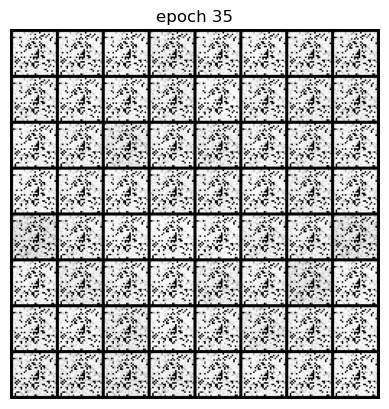

Epoch 35 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.83it/s]                                                                                               


Epoch 36 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.97it/s]                                                                                               


Epoch 37 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.87it/s]                                                                                               


Epoch 38 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.51it/s]                                                                                               


Epoch 39 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.02it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


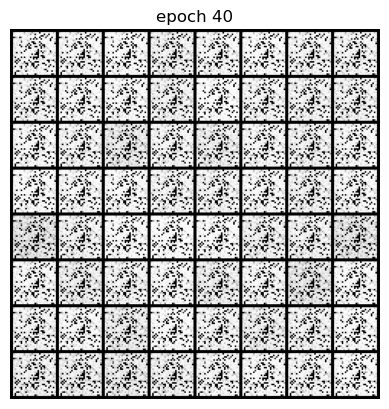

Epoch 40 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.97it/s]                                                                                               


Epoch 41 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.14it/s]                                                                                               


Epoch 42 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.12it/s]                                                                                               


Epoch 43 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  8.01it/s]                                                                                               


Epoch 44 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.81it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


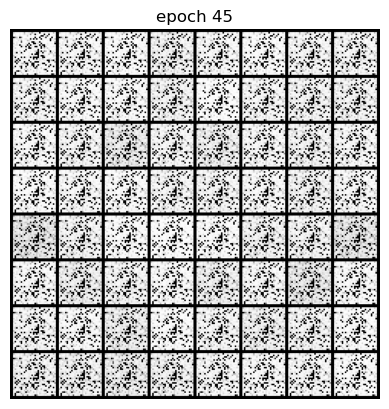

Epoch 45 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.59it/s]                                                                                               


Epoch 46 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.88it/s]                                                                                               


Epoch 47 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.88it/s]                                                                                               


Epoch 48 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.86it/s]                                                                                               


Epoch 49 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.73it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


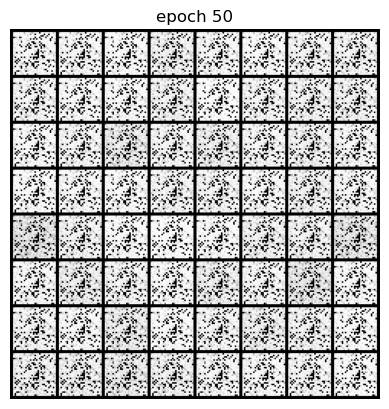

Epoch 50 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:14,  7.90it/s]                                                                                               


Epoch 51 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:15,  7.72it/s]                                                                                               


Epoch 52 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:48,  2.45it/s]                                                                                               


Epoch 53 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:55,  2.11it/s]                                                                                               


Epoch 54 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:56,  2.08it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


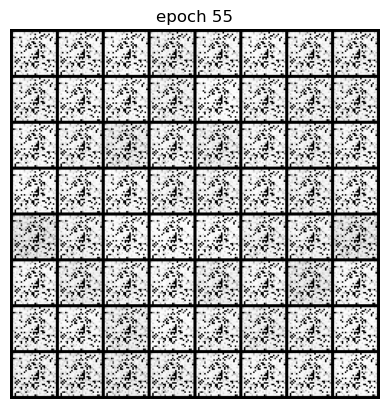

Epoch 55 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:55,  2.13it/s]                                                                                               


Epoch 56 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:56,  2.08it/s]                                                                                               


Epoch 57 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:52,  2.25it/s]                                                                                               


Epoch 58 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:53,  2.19it/s]                                                                                               


Epoch 59 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:53,  2.20it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


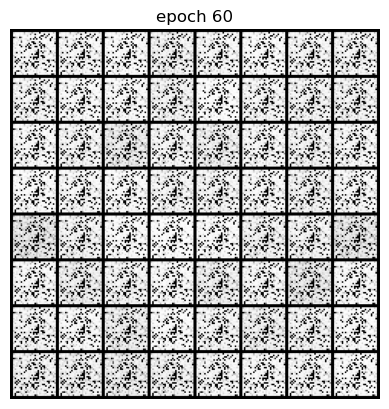

Epoch 60 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:54,  2.16it/s]                                                                                               


Epoch 61 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:56,  2.07it/s]                                                                                               


Epoch 62 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:58,  2.02it/s]                                                                                               


Epoch 63 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:56,  2.09it/s]                                                                                               


Epoch 64 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:54,  2.16it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


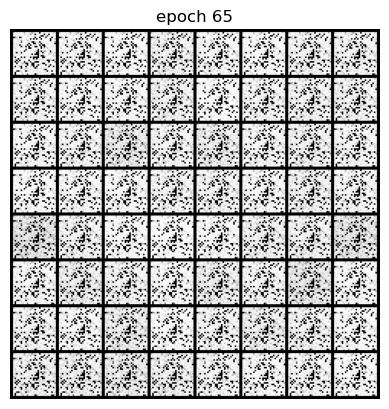

Epoch 65 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:57,  2.07it/s]                                                                                               


Epoch 66 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:55,  2.13it/s]                                                                                               


Epoch 67 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:56,  2.08it/s]                                                                                               


Epoch 68 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:55,  2.14it/s]                                                                                               


Epoch 69 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:55,  2.11it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


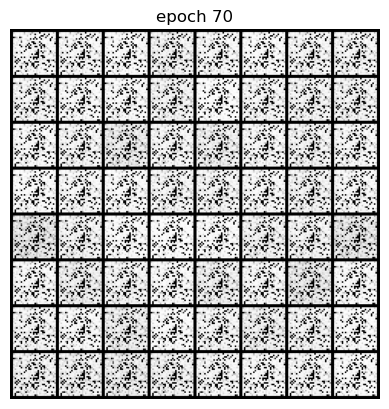

Epoch 70 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:56,  2.10it/s]                                                                                               


Epoch 71 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:56,  2.09it/s]                                                                                               


Epoch 72 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:55,  2.13it/s]                                                                                               


Epoch 73 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:58,  2.03it/s]                                                                                               


Epoch 74 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:57,  2.06it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


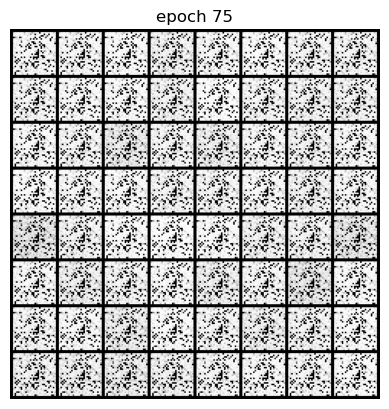

Epoch 75 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:56,  2.09it/s]                                                                                               


Epoch 76 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:04,  1.83it/s]                                                                                               


Epoch 77 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:06,  1.77it/s]                                                                                               


Epoch 78 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:09,  1.70it/s]                                                                                               


Epoch 79 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:12,  1.62it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


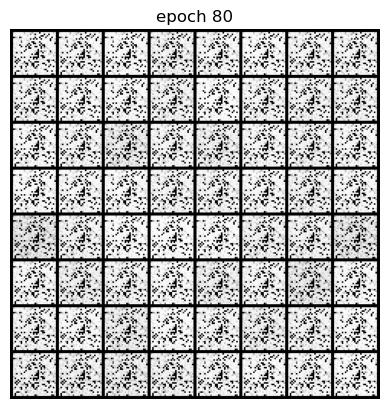

Epoch 80 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:11,  1.64it/s]                                                                                               


Epoch 81 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:09,  1.71it/s]                                                                                               


Epoch 82 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:13,  1.61it/s]                                                                                               


Epoch 83 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:08,  1.72it/s]                                                                                               


Epoch 84 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:11,  1.65it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


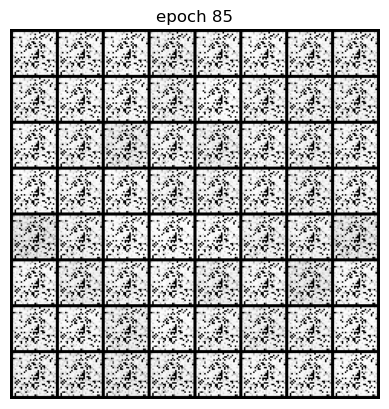

Epoch 85 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:11,  1.65it/s]                                                                                               


Epoch 86 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:14,  1.58it/s]                                                                                               


Epoch 87 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:14,  1.59it/s]                                                                                               


Epoch 88 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:11,  1.66it/s]                                                                                               


Epoch 89 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:12,  1.63it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


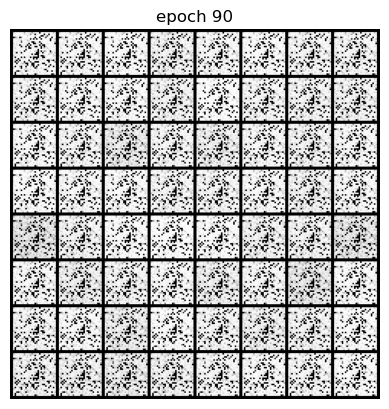

Epoch 90 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:12,  1.63it/s]                                                                                               


Epoch 91 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:14,  1.58it/s]                                                                                               


Epoch 92 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:13,  1.60it/s]                                                                                               


Epoch 93 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:08,  1.73it/s]                                                                                               


Epoch 94 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:13,  1.60it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


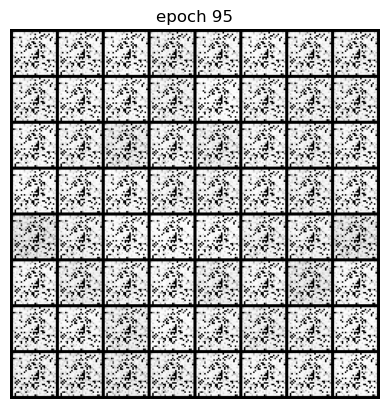

Epoch 95 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:09,  1.69it/s]                                                                                               


Epoch 96 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:12,  1.63it/s]                                                                                               


Epoch 97 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:14,  1.58it/s]                                                                                               


Epoch 98 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:09,  1.70it/s]                                                                                               


Epoch 99 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [01:11,  1.64it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


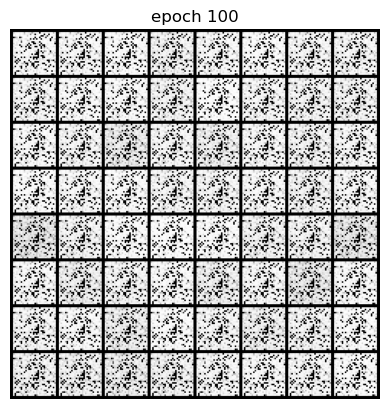

Epoch 100 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


In [15]:
# Make output folders
!mkdir -p outputs_1b

#initialize
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

#loop
epochs =100
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        # Training the Discriminator
        discriminator.zero_grad()
        
        real_images = data[0].to(device)
        real_labels = label_real(real_images.size(0))
        
        # Forward pass real images through discriminator
        output_real = discriminator(real_images)
        
        # Generate fake images
        noise_d = create_noise(real_images.size(0), nz)
        fake_images = generator(noise_d)
        fake_labels = label_fake(fake_images.size(0))
        
        # Forward pass fake images through discriminator
        output_fake = discriminator(fake_images.detach())  # Detach to avoid computing gradients for generator
        
        # Compute total discriminator loss and backpropagate
        total_loss_d = discriminator_loss(output_real, output_fake, real_labels, fake_labels)
        total_loss_d.backward()
        optim_d.step()
        
        loss_d += total_loss_d.item()
        
        ####################
        # Training the Generator
        generator.zero_grad()
        
        # Generate fake images
        noise_g = create_noise(real_images.size(0), nz)
        fake_images = generator(noise_g)
        
        # Forward pass fake images through discriminator after generator update
        output = discriminator(fake_images)
        loss_g = generator_loss(output, fake_labels) 
        
        # Backpropagate the generator loss
        loss_g.backward()
        optim_g.step()
        
        loss_g += loss_g.item()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs_1b/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [16]:
g_loss = [losses_g[i].item() for i in range(len(losses_g))]

In [17]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs_1b/generator.pth')

DONE TRAINING


In [18]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_1b/generator_images.gif', imgs)

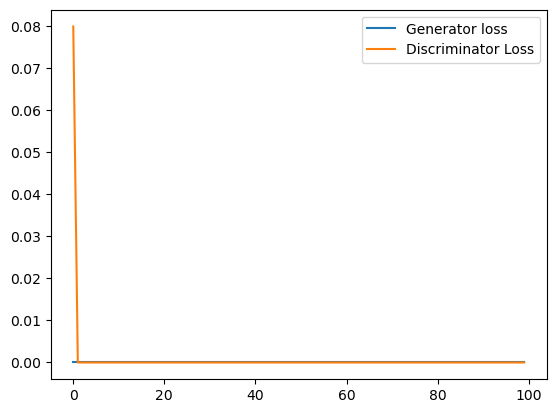

In [19]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(g_loss, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs_1b/loss.png')